In [23]:
import numpy as np
from matplotlib import pyplot as plt

Define the problem parameters


In [24]:
A = np.array([[1, 3], [3, 1]]) # low dimensions to plot it, you can test larger sizes
b = np.array([-1, 2])

lmbda = 0.5


The function to be minimized is $\frac{1}{2}\|Ax-b\|_2^2 + \lambda \|x\|_1$

In [25]:
f = lambda x: 0.5 * np.sum((A @ x - b) ** 2)
F = lambda x: f(x) + lmbda * np.sum(np.abs(x))

# derivative of f from matrix calculus
df = lambda x: A.T @ (A @ x) - A.T @ b


Plot the function

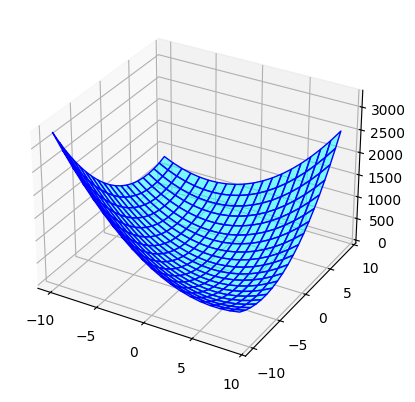

In [26]:
# this function has been prepared only for the visualization sake, no need to go through this but it renders some nice
# graphics :)
Fplot = lambda r1, r2: (r1 * A[0, 0] + r2 * A[0, 1] - b[0]) ** 2 + (r1 * A[1, 0] + r2 * A[1,1] - b[1]) ** 2 + lmbda * (np.abs(r1) + np.abs(r2))
xx, yy = np.meshgrid(np.arange(-10, 10, 1), np.arange(-10, 10, 1))

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(xx, yy, Fplot(xx, yy), edgecolor=[0, 0, 1], alpha=0.5, facecolor=[0, 1, 1])

ISTA with backtracking
----------------------------
Parameters of ISTA

In [27]:
MAX_ITER = 1e3
TOL_DIST_X = 1e-6
# initial value for alpha
alpha = 1
# parameter for backtracking
eta = 0.99

Initialization: test different inizializations, the function is convex, you always converge to the same solution

In [28]:
x = np.array([-5, 10])

grad_norm = 1e10
distanceX = 1e10

# initialize the list with all the estimates
all_x = [x]
x_past = x

Main loop

In [29]:
def soft_threshold(x, threshold):
    return np.sign(x) * np.maximum(np.abs(x) - threshold, 0)

In [30]:
cnt = 0
alpha_current = alpha
while cnt < MAX_ITER and distanceX > TOL_DIST_X:

    # compute the argument of the proximal operator
    x_current = x - alpha * df(x)

    # perform soft thresholding of x
    x_current = soft_threshold(x, alpha_current * lmbda)

    # iterate the backtracking procedure until the stopping criterion is met
    while True:
        cnt = cnt + 1

        # Check backtracking
        lhs = f(x_current)
        rhs = (
            f(x)
            + np.dot(df(x), x_current - x)
            + (1 / (2 * alpha_current)) * np.linalg.norm(x_current - x) ** 2
        )

        if lhs <= rhs:
            break

        # update alpha
        alpha_current = eta * alpha_current

        # compute again x
        x_current = x - alpha_current * df(x)

        # perform soft thresholding
        x_current = soft_threshold(x_current, alpha_current * lmbda)

    # compute the stopping criteria
    distanceX = np.linalg.norm(x_current - x)

    # store the estimate
    all_x.append(x_current.copy())

    # Update for next iteration
    x = x_current.copy()
    alpha_current = alpha

Plot all the estimates

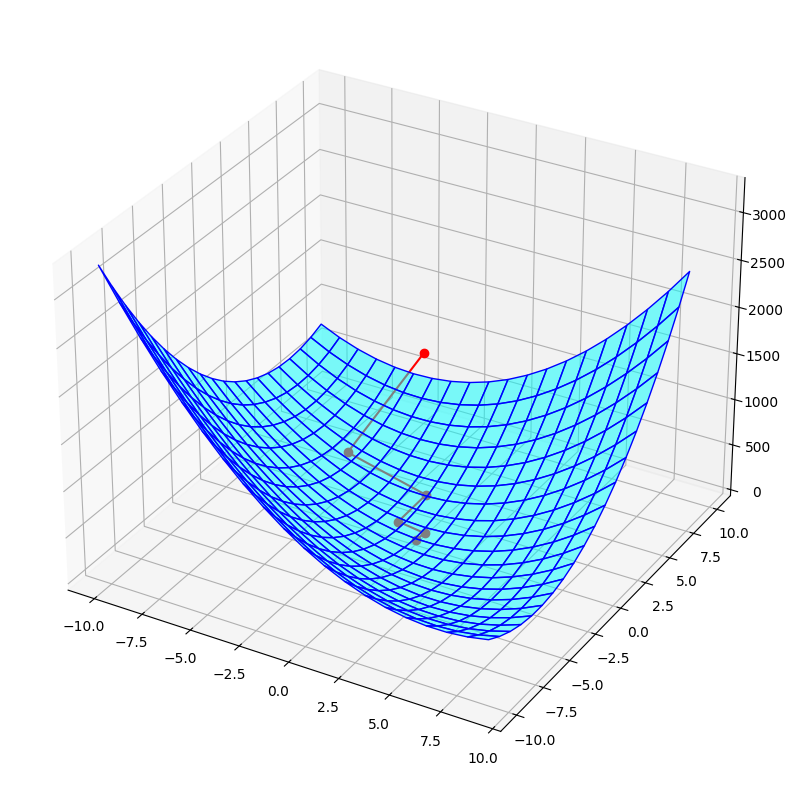

In [31]:
# plot the new estimate
xxplot = [x[0] for x in all_x]
yyplot = [x[1] for x in all_x]
zzplot = Fplot(np.array(xxplot), np.array(yyplot))

fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.plot_surface(xx, yy, Fplot(xx, yy), edgecolor=[0, 0, 1], alpha=0.5, facecolor=[0, 1, 1])
ax.plot3D(xxplot, yyplot, zzplot, 'r-o')

Compare the number of iteration needed for convergence with backtracking with the number of iteration required using the optimal alpha

In [32]:
print(f'nr of iteration of ISTA with backtracking (before stopping criteria met): {cnt}\n')
print(f'Solution of ISTA: [{x_current[0]:.4f}, {x_current[1]:.4f}]\n')
print(f'Value of the functional: {F(x_current):.4f}\n')

nr of iteration of ISTA with backtracking (before stopping criteria met): 1158

Solution of ISTA: [0.0962, -0.0689]

Value of the functional: 2.0631



FISTA
-----
Parameters of FISTA

In [33]:
MAX_ITER = 1e3
TOL_DIST_X = 1e-6
# set the optimal value for alpha
# alpha =

Initialization: test different inizializations, the function is convex, you always converge to the same solution

In [34]:
# initialize x
x = np.array([-5., 10.])

# initialize y
y = x.copy()

# initialize gamma
gamma = 1
alpha = 1 / np.max(np.linalg.eigvals(A.T @ A)) # optimal step size

grad_norm = 1e10
distanceX = 1e10

# initialize the list with all the estimates
all_x = [x]



Main loop

In [35]:
cnt = 0
while cnt < MAX_ITER and distanceX > TOL_DIST_X:
    # compute the argument of the proximal operator
    grad = df(y)

    # perform soft thresholding of x
    x_new = soft_threshold(y - alpha * grad, alpha * lmbda)

    # update gamma
    gamma_new = (1 + np.sqrt(1 + 4 * gamma**2)) / 2

    # update y
    y = x_new + ((gamma - 1) / gamma_new) * (x_new - x)

    # compute the stopping criteria
    distanceX = np.linalg.norm(x_new - x)

    # store the estimate
    all_x.append(x_new.copy())
    x = x_new.copy()
    gamma = gamma_new
    cnt += 1

x_current = x.copy()

Plot all the estimates

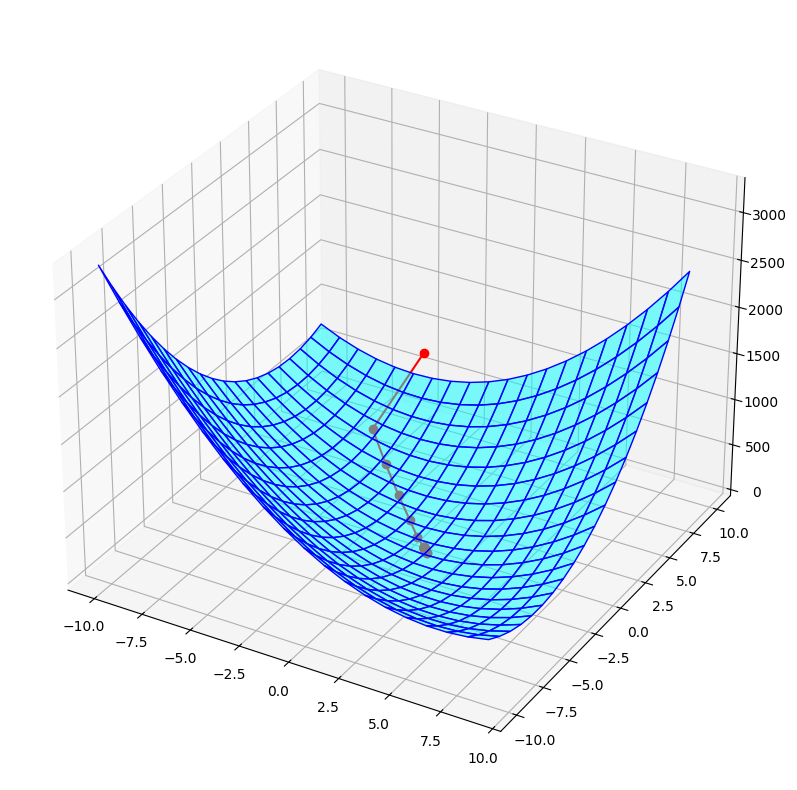

In [36]:
# plot the new estimate
xxplot = [x[0] for x in all_x]
yyplot = [x[1] for x in all_x]
zzplot = Fplot(np.array(xxplot), np.array(yyplot))

fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.plot_surface(xx, yy, Fplot(xx, yy), edgecolor=[0, 0, 1], alpha=0.5, facecolor=[0, 1, 1])
ax.plot3D(xxplot, yyplot, zzplot, 'r-o')

In [37]:
print(f'nr of iteration of FISTA (before stopping criteria met): {cnt}\n')
print(f'Solution of FISTA: [{x_current[0]:.4f}, {x_current[1]:.4f}]\n')
print(f'Value of the functional: {F(x_current):.4f}\n')

nr of iteration of FISTA (before stopping criteria met): 69

Solution of FISTA: [0.7500, -0.5000]

Value of the functional: 0.6875

